<a href="https://colab.research.google.com/github/GyanGartia/Machine-Learning/blob/main/CIA3_2147216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTING FOREST FIRE (GUI)**

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.2 MB/s 
     |████████████████████████████████| 212 kB 49.4 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 270 kB 68.3 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 112 kB 67.4 MB/s 
     |████████████████████████████████| 2.3 MB 45.7 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 80 kB 9.2 MB/s 
     |████████████████████████████████| 68 kB 5.7 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 856 kB 50.8 MB/s 
     |████████████████████████████████| 594 kB 67.

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
import gradio as gr
from sklearn.metrics import accuracy_score

%matplotlib inline

In [ ]:
# data = pd.read_csv('forestfires.csv')
data = pd.read_csv('/content/drive/MyDrive/dataset/forestfires.csv')
data = data.dropna()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
data['impact'] = [0 if area == 0 else 1 for area in data['area']]

In [ ]:
data = data.drop(['X', 'Y', 'month', 'day'], axis=1)
# data = data.drop(['rain'], axis=1)
# data = data.drop(['X', 'Y'], axis=1)
# data = data.drop(['month', 'day'], axis=1)

In [ ]:
# # Convert categorical variables (months and days) into numerical values
# months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# days_table = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

# data['month'] = [months_table.index(month) for month in data['month'] ]
# data['day']   = [days_table.index(day)  for day in data['day']   ]

In [ ]:
target = data.impact

In [ ]:
#standardization of data
scaler = StandardScaler()

t_df = data.drop(['area', 'impact'], axis =1)

#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(t_df)

scaled_features = scaler.transform(t_df)
inputs = pd.DataFrame(scaled_features,columns=data.columns[:-2])
inputs.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [ ]:
#dividing dataset into 70-30% training and testing 
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3)

**EUCLIDIAN DISTANCE MEASURE:**

In [ ]:
# NOW WITH K = 3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=3
[[40 37]
 [34 45]]
              precision    recall  f1-score   support

           0       0.54      0.52      0.53        77
           1       0.55      0.57      0.56        79

    accuracy                           0.54       156
   macro avg       0.54      0.54      0.54       156
weighted avg       0.54      0.54      0.54       156



In [ ]:
print("model score when k=3 is :",  knn.score(x_test, y_test))

model score when k=3 is : 0.5448717948717948


For Knn-2: 

              precision    recall  f1-score   support

           0       0.46      0.69      0.55        77
           1       0.40      0.20      0.27        79

    accuracy                           0.44       156
   macro avg       0.43      0.45      0.41       156
weighted avg       0.43      0.44      0.41       156

Accuracy Score for K 2 is: 44.230769230769226 %
*************************************
For Knn-3: 

              precision    recall  f1-score   support

           0       0.54      0.52      0.53        77
           1       0.55      0.57      0.56        79

    accuracy                           0.54       156
   macro avg       0.54      0.54      0.54       156
weighted avg       0.54      0.54      0.54       156

Accuracy Score for K 3 is: 54.48717948717948 %
*************************************
For Knn-4: 

              precision    recall  f1-score   support

           0       0.51      0.71      0.60        77
           1       0.55    

NameError: ignored

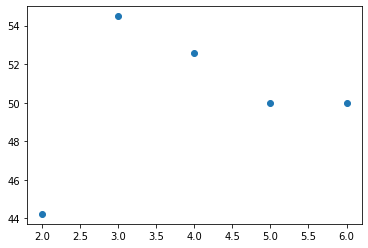

<Figure size 144x216 with 0 Axes>

In [ ]:
y1=[]
for i in range(2,7):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    print(f"For Knn-{i}: \n")
    print(classification_report(y_test,pred))
    print("Accuracy Score for K",i,"is:", accuracy_score(y_test, pred)*100, "%")
    y1.append(metrics.accuracy_score(y_test, pred)*100)
    print('*************************************')

plt.scatter(range(2,7),y1)
plt.figure(figsize=(2, 3))
plt.plot(range(2,30,2),acc,color = 'blue', linestyle='dashed',  marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show

In [ ]:
#prediction using KNN
class_label={1:'There is Fire',0:'There is no fire'}
x_new=[[91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]

y_pred = knn.predict(x_new)
print(class_label[y_pred[0]])

There is Fire


In [ ]:
def forest(FFMC,	DMC,	DC,	ISI,	temp,	RH,	wind,	rain):

#turning the arguments into a numpy array  
  x = np.array([FFMC,	DMC,	DC,	ISI,	temp,	RH,	wind,	rain])

#prediction = model.predict(x.values.reshape(1,-1))
  prediction=knn.predict(x.reshape(1,-1))
  if(int(prediction)==0):
    return("No Fire")
  else:
    return("Fire can be there")

In [ ]:
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=forest, inputs=['number','number','number','number','number','number','number','number'], outputs=outputs,description="Forest fire Prediction")

In [ ]:
app.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15222.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f5e58614d90>,
 'http://127.0.0.1:7860/',
 'https://15222.gradio.app')

In [ ]:
# FFMC = float(input("Enter the FFMC value: (18.7-96.2) "))
# DMC = float(input("Enter the DMC value: (1.1-291.3) "))
# DC = float(input("Enter the DC value: (7.9-860.6) "))
# ISI = float(input("Enter the ISI value: (0.0-56.10) "))
# temp = float(input("Enter the temp value: (2.2-33.30) "))
# RH = float(input("Enter the RH value: (15-100) "))
# wind = float(input("Enter the wind value: (0.49-9.40) "))
# rain = float(input("Enter the rain value: (0-6.4) "))

In [ ]:
# x_new=[[FFMC,	DMC,	DC,	ISI,	temp,	RH,	wind,	rain]]

# y_pred = knn.predict(x_new)
# print(class_label[y_pred[0]])